# Predicting Life Expectancy using Linear Regression

## Data Preparation

In [1]:
# Import the required libraries
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats.mstats import winsorize

%matplotlib inline

Source of our Dataset is from https://www.kaggle.com/kumarajarshi/life-expectancy-who

In [2]:
# Loading the dataset into a DataFrame df
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
#Print out the first 5 rows.
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#print the summary of the dataset which gives a description of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

From the dataset it is clear that Country and Status are Categorical (Nominal) columns and all others are in numerical column.

There are missing values in Life expentancy,Adult Mortailty, Alcohol, Hepatitis B, BMI, GDP, Diphtheria,HIV/AIDS, Population, Thinness 1-19 years, Thinness 5-9 years, Income composition of resource and Schooling.

> Life expectancy will be our *Target Variable* and other numerical columns can be considered for feature variables.

In [5]:
#print the shape of the DataFrame
df.shape
# There are 2938 row and 22 columns

(2938, 22)

In [6]:
#print details statistical summary
df.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


From the above summary of data, it is noted that the standard deviation of the variables Infant deaths, Percentage expenditure, Measles, Under-five deaths, GDP, Population is higher than the mean value.

This implies that the data is not centered around its mean and is more spread out, which may be due to Outliers or data might be highly Skewed.

In [7]:
#Check if there is duplicate data in the dataset or not
duplicates = df.duplicated().sum()
count = df.shape[0]
print(f'There are {duplicates} duplicate rows in {count} rows')

There are 0 duplicate rows in 2938 rows


### Handling Missing Values

In [8]:
#Checking the null values in the dataframe and its sum
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage Expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
#Function to return the sum of missing values and its average from the dataframe
def missing_values(df):
    df_miss=pd.DataFrame(df.isnull().sum()/len(df))*100
    df_miss.columns = ['missing_values(%)']
    df_miss['missing_values'] = pd.DataFrame(df.isnull().sum())
    return df_miss.sort_values(by='missing_values(%)', ascending=False)

missing_values(df)

,missing_values(%),missing_values
Population,22.191967,652
Hepatitis B,18.822328,553
GDP,15.248468,448
Total expenditure,7.692308,226
Alcohol,6.603131,194
Income composition of resources,5.684139,167
Schooling,5.547992,163
Thinness 5-9 years,1.157250,34
Thinness 1-19 years,1.157250,34
BMI,1.157250,34


In [10]:
#Checking the unique length of categorical column to understand about the dataset.
len(pd.unique(df['Country'])) 

193

With only 2038 rows and 22 columns with 193 countries data, it is not a big dataset. So each vaiable carries some information and that information could be invaluable to our analysis.It is not a good option to drop all the missing values, as every row in our dataset is having at least one missing value.
As the dataset is sorted by country and year it is better to apply interpolation to handle the missing values.

In [11]:
#Assigning the list of missing columns to missing_cols variable
missing_cols = list(df.columns[df.isnull().any()])
missing_values(df[missing_cols])

,missing_values(%),missing_values
Population,22.191967,652
Hepatitis B,18.822328,553
GDP,15.248468,448
Total expenditure,7.692308,226
Alcohol,6.603131,194
Income composition of resources,5.684139,167
Schooling,5.547992,163
BMI,1.157250,34
Thinness 1-19 years,1.157250,34
Thinness 5-9 years,1.157250,34


In [12]:
#Looping over the column list in the dataset to fill missing columns with interpolation method. 
#It works only for Numerical data, keeping all the rows and only columns that has missing values for interpolate method.

for x in missing_cols:
    df.loc[:, x] = df.loc[:, x].interpolate()

In [13]:
print(f'There are {df.isnull().sum().sum()} columns with Null values in the dataset.')

There are 0 columns with Null values in the dataset.


### Exploratory Data analysis

In [14]:
#Checking for summary of the data for furthe analysis
df.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.00000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.214874,164.744554,30.303948,4.550179,738.251295,78.528421,2419.592240,38.29869,42.035739,82.474643,5.940643,82.246086,1.742103,7434.749690,1.227954e+07,4.882301,4.920439,0.634369,12.075170
std,4.613841,9.510819,124.226596,117.926501,3.994827,1987.914858,25.183772,11467.272489,19.99140,160.445548,23.420689,2.445735,23.705664,5.077785,13411.023325,5.471776e+07,4.433359,4.532488,0.209603,3.342988
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.00000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.902500,4.685343,71.000000,0.000000,19.32500,0.000000,78.000000,4.312500,78.000000,0.100000,553.618620,2.534093e+05,1.600000,1.600000,0.500000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,3.702500,64.912906,89.000000,17.000000,43.25000,4.000000,93.000000,5.755000,93.000000,0.100000,2192.681084,1.574070e+06,3.400000,3.400000,0.684000,12.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.550000,441.534144,96.000000,360.250000,56.10000,28.000000,97.000000,7.440000,97.000000,0.800000,7188.875869,8.207892e+06,7.200000,7.300000,0.791107,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.30000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


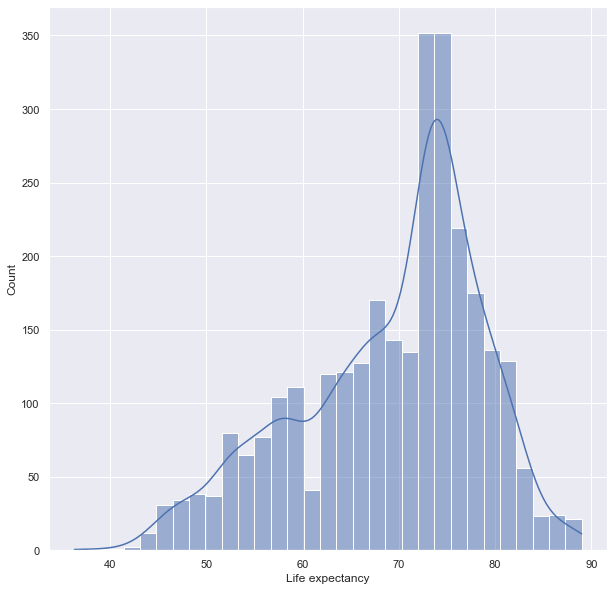

In [15]:
#Pltting using histogram to find the distribution of target variable Life Expectancy 

# Set up the seaborn figure
sb.set(rc={'figure.figsize':(10,10)})

#Draw the histplot
sb.histplot(df['Life expectancy'],kde=True)
plt.show()

From the summary data, Life Expectancy's maximum value 89.0 is about 2.08 standard deviations away from the mean 69.2 while the minimum 36.3 is about 3.46 deviations away. The standard deviation for the whole sample is 9.50 years.

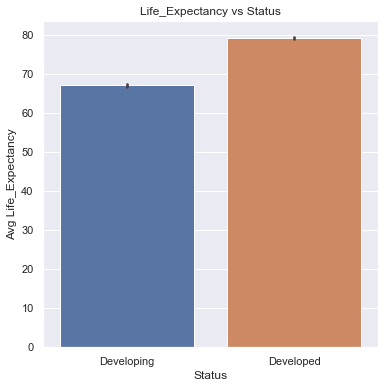

,Life expectancy
Status,
Developed,79.20
Developing,67.11


In [16]:
# Set up the seaborn figure
sb.set(rc={'figure.figsize':(6,6)})

#Draw the barplot with country status and life expectancy variable
sb.barplot(data=df, y='Life expectancy',x='Status', orient = 'v')

#Adding the lable and title to the plot
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy vs Status")

plt.show()

#Finding thethe average life expectancy between both status. 
round(df[['Status','Life expectancy']].groupby(['Status']).mean(),2)

 The above data shows that developed countries have higher average of Life expectancy compared to developing countries.

Now Let's find distribution of the values using histogram and Box Plot for each continuous variable to visually see if outliers exist.

In [17]:
#Dropping the categorical variable to plot histogram and boxplot.
df_num = df.drop(columns=["Year","Country","Status"])

# Storing numerical column list into a variable
num_col = df_num.select_dtypes(exclude='object').columns.tolist()

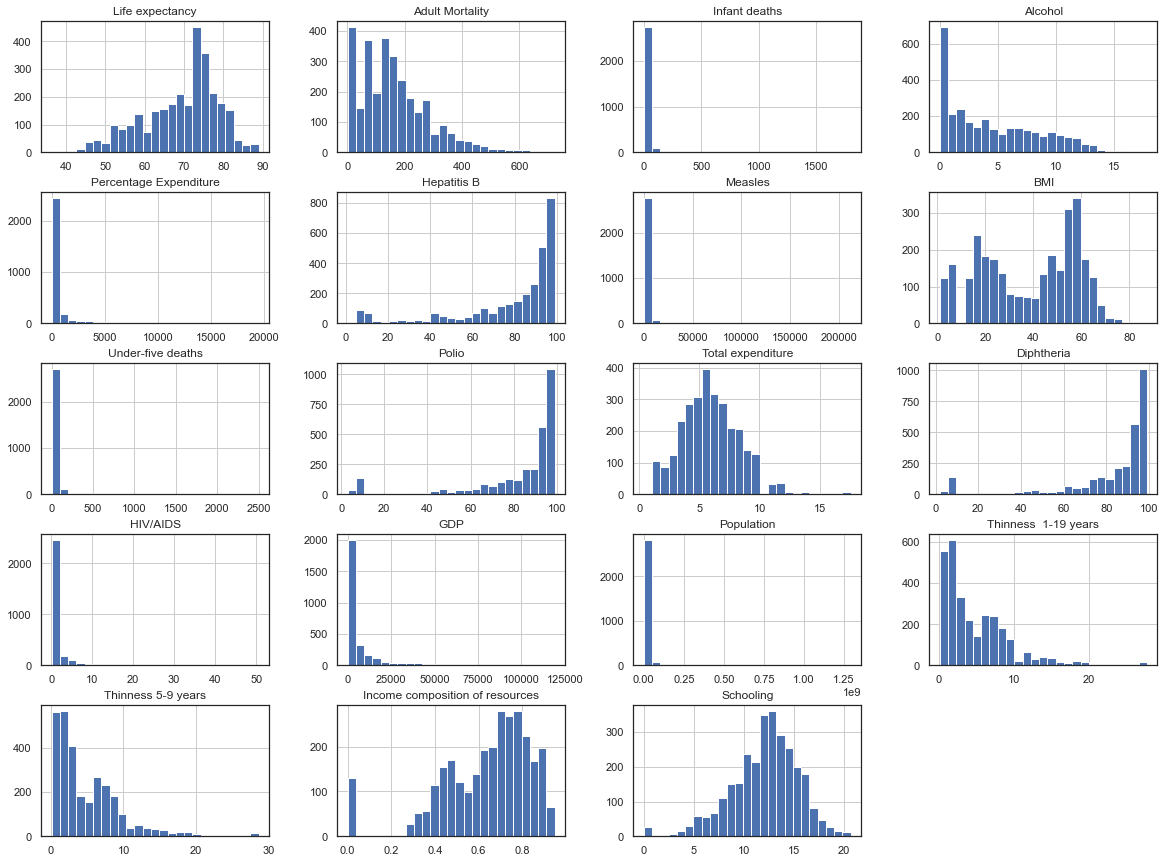

In [18]:
#Plotting histogram for all numerical variables of dataframe to find the distribution
# Set background color of corr matrix to White
sb.set_theme(style="white")

# Draw the hist plot with numerical variables
df_num.hist(bins=25, figsize=(20,15))
plt.show()

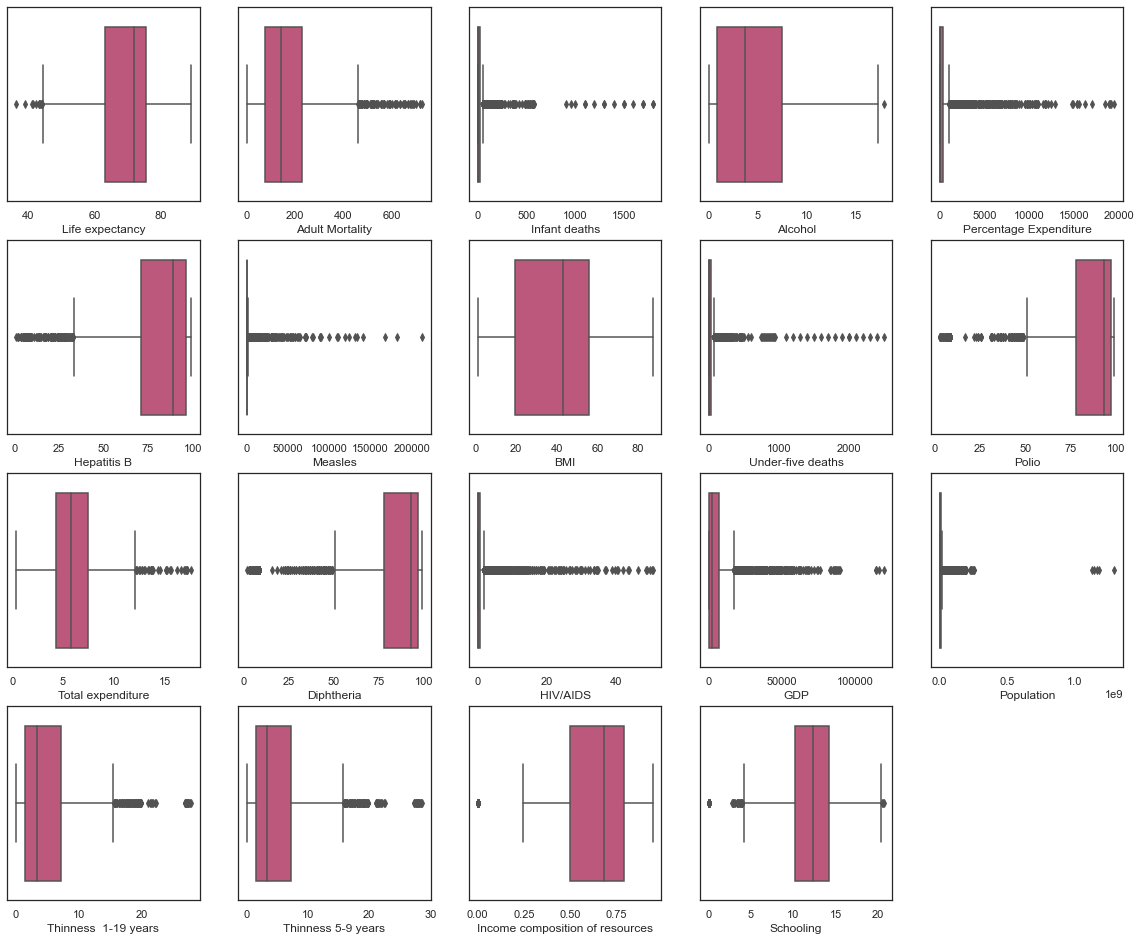

In [19]:
#Ploting Box plot across all the numerical columns to determine the outliers in dataset

# Set up the matplotlib figure
plt.figure(figsize=(20,25))

# Set background color of corr matrix to White
sb.set_theme(style="white")

#Loping over the numerical columns to draw boxplot
for i,col in enumerate(num_col):
    plt.subplot(6,5,i+1)
    sb.boxplot(x = df_num[col],palette='plasma')

plt.show()

It is clear that there are a most number of variables have outliers - including the target variable Life expectancy. 
All these attributes are at different scales. Feature scaling is needed as most of the plots are tail heavy i.e. left skewed.

### Outlier Detection

 We use IQR to get the number of outliers in data by finding the range between 1st and 3rd quartiles. It classifies the outliers if the values are outside the threshold of 1.5 * IQR.

In [20]:
#Function to detect the outliers using IQR
def outlier_count(col, data=df):
    #q75, q25 = np.percentile(data[col], [25, 75])
    # calculate the interquartile range(Q1,Q3)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    min_val = Q1 - (IQR*1.5)
    max_val = Q3 + (IQR*1.5)
    #Finding the length of data that is more than max threshold and lesser than min threshold
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Variable Name: {:<31s} | Number of outliers: {:<3} | Percent of data that is outlier: {:.2f}%'.format(col,outlier_count,outlier_percent))

In [21]:
#Looping over all the numerical columns to outlier count function to find the total count of outliers in data.
print("\n"+50*'*' + ' Outliers ' + 50*'*'+"\n")
for col in num_col:
    outlier_count(col)


************************************************** Outliers **************************************************

Variable Name: Life expectancy                 | Number of outliers: 12  | Percent of data that is outlier: 0.41%
Variable Name: Adult Mortality                 | Number of outliers: 82  | Percent of data that is outlier: 2.79%
Variable Name: Infant deaths                   | Number of outliers: 315 | Percent of data that is outlier: 10.72%
Variable Name: Alcohol                         | Number of outliers: 1   | Percent of data that is outlier: 0.03%
Variable Name: Percentage Expenditure          | Number of outliers: 389 | Percent of data that is outlier: 13.24%
Variable Name: Hepatitis B                     | Number of outliers: 248 | Percent of data that is outlier: 8.44%
Variable Name: Measles                         | Number of outliers: 542 | Percent of data that is outlier: 18.45%
Variable Name: BMI                             | Number of outliers: 0   | Percent of 

Since each variable has a unique amount of outliers and also outliers are on different sides of the data, the best method to eliminate outlier is probably <b>winsorizing</b> (limiting) the values which will reduce the effect of possibly spurious outliers by limiting the extreme values.

Outliers can be handled either by dropping them from dataset or transforming the variables use mean, median or by winsorization.
As the outlier count quite high, instead of dropping them we planned to follow winsorize method to limit them within specified percentile. 

If the limit given in (0.1, 0.2) --> The 10% of the lowest value (i.e., 1) and the 20% of the highest values (i.e., 9 and 10) are replaced.

>Winsorising is a process used to limit the extreme values in the dataset to reduce the effect of possibly spurious outliers.

In [22]:
#Using function applying winsorize technique to cap the outliers and adding the new winsorized column to winsor_dict 
# which can be used for futher implementation.
def winsor(col, lower_limit=0, upper_limit=0, show_plot=True):
    
    #Using scipy.stats.mstats.winsorize to each column
    winsor_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    
    #Assigning the winsorized data from each column to  dict
    winsor_dict[col] = winsor_data
    
    #Using box plot, visializing the data to check the outliers before and after winsorizing
    if show_plot == True:
        plt.figure(figsize=(15,5))
        
        #draw plot with original dataset
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('Original {}'.format(col))
        
        #draw plot with winsorized dataset
        plt.subplot(122)
        plt.boxplot(winsor_data)
        
        #assigning titile to the plot
        plt.title('Winsorized {}'.format(col))
        plt.show()

In [23]:
#for i in num_col:
#    print(f"winsor(num_col['{i}'],lower_limit = .01,show_plot =True)")

num_col

['Life expectancy',
 'Adult Mortality',
 'Infant deaths',
 'Alcohol',
 'Percentage Expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'Under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'Thinness  1-19 years',
 'Thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

Inorder to winsorize each column in the data set, limit has to be provided as Tuple of the percentages to cut on each side of the array, with respect to the number of unmasked data, as floats between 0. and 1.

By default lower and upper limit of winsor function is 0

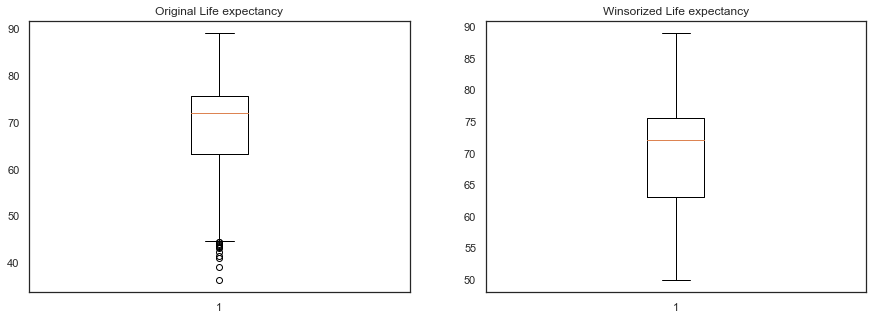

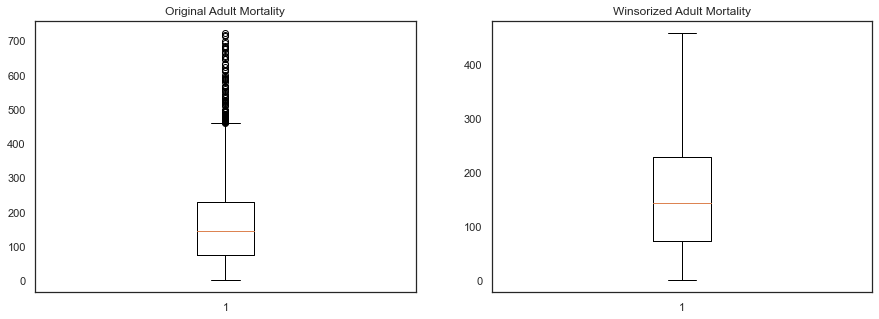

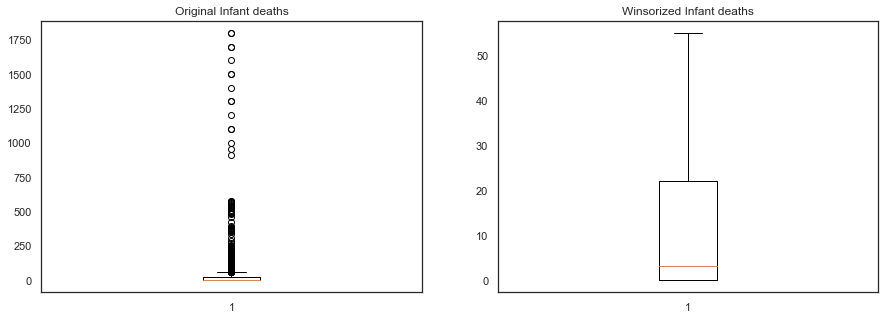

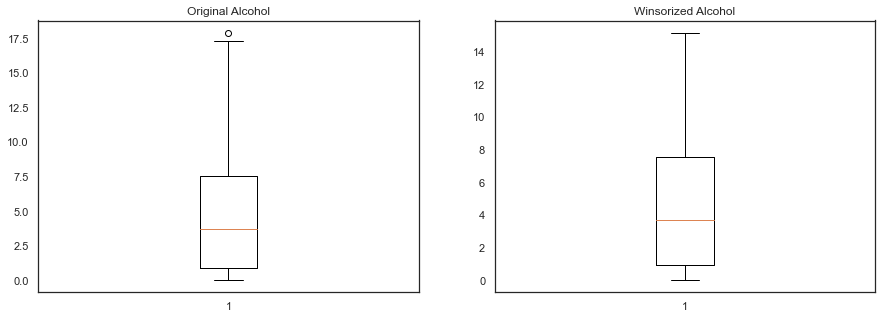

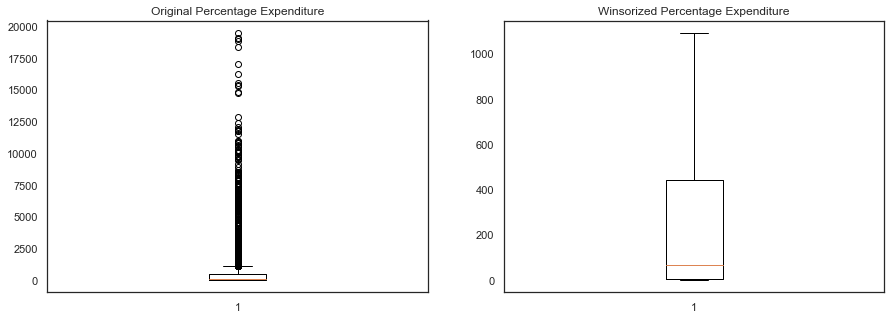

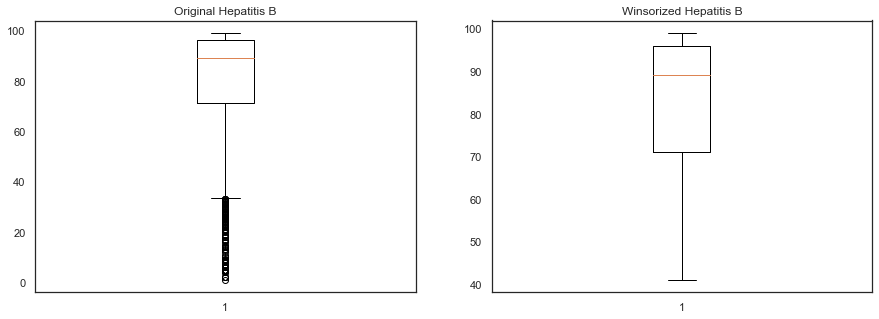

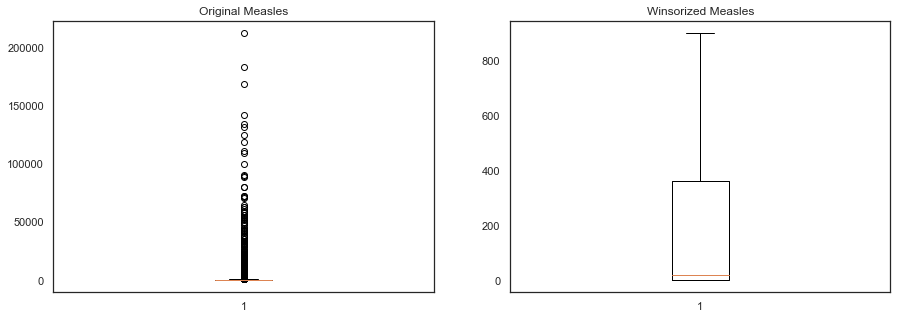

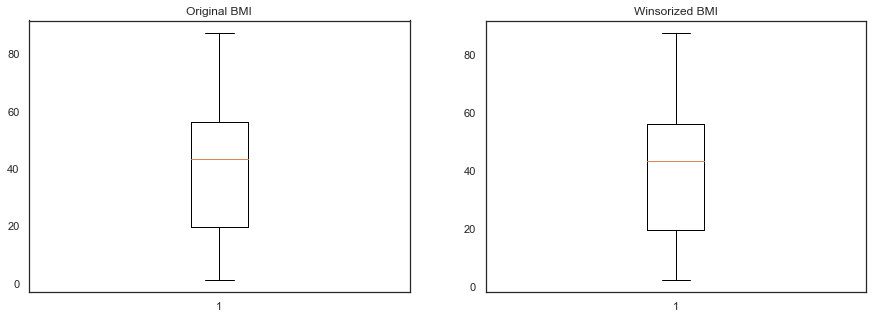

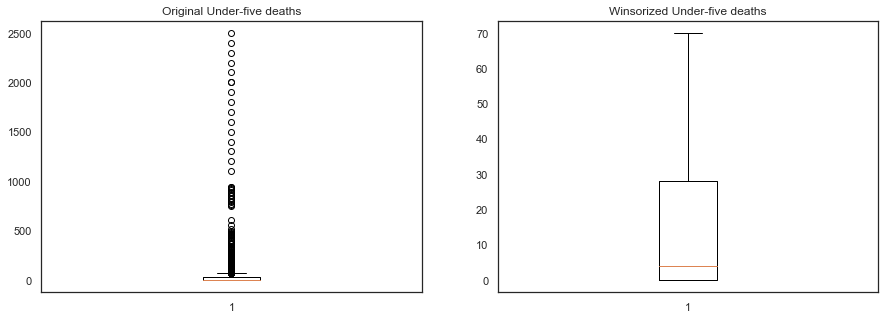

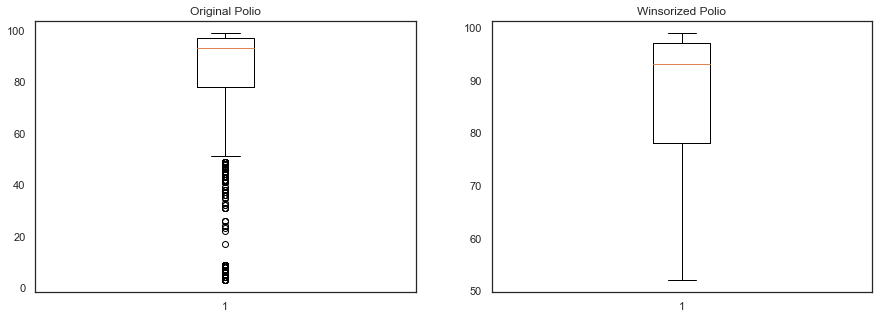

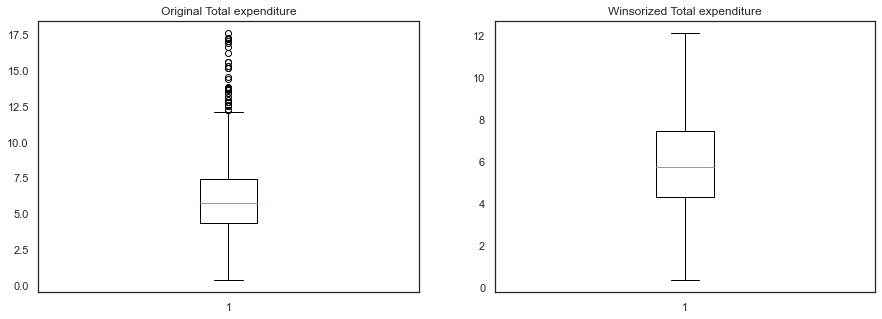

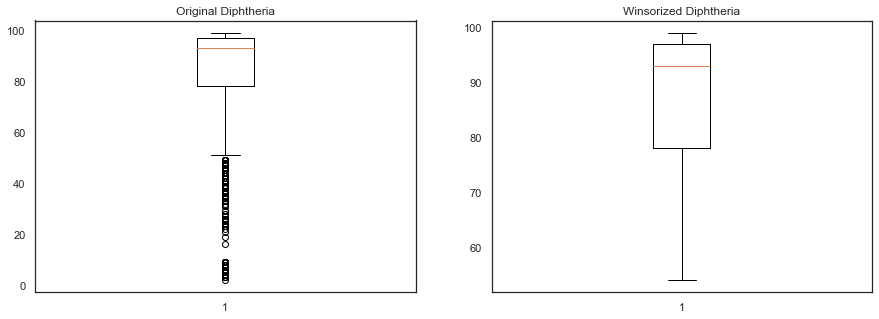

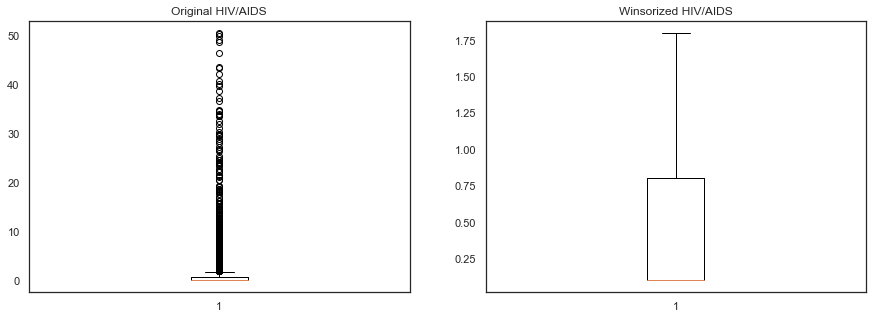

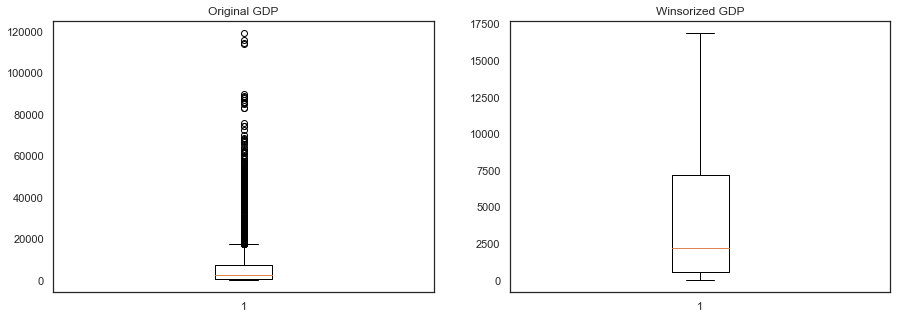

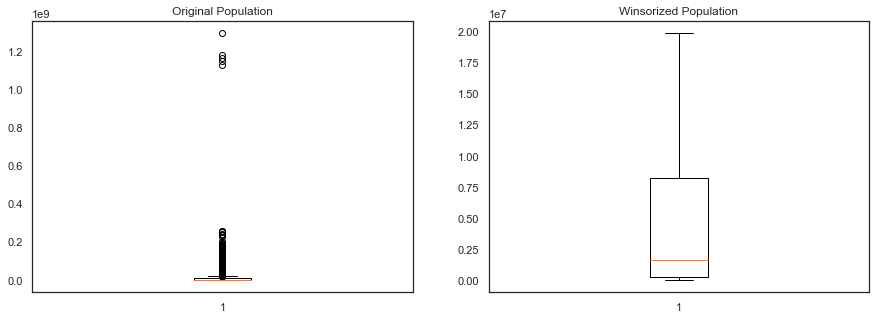

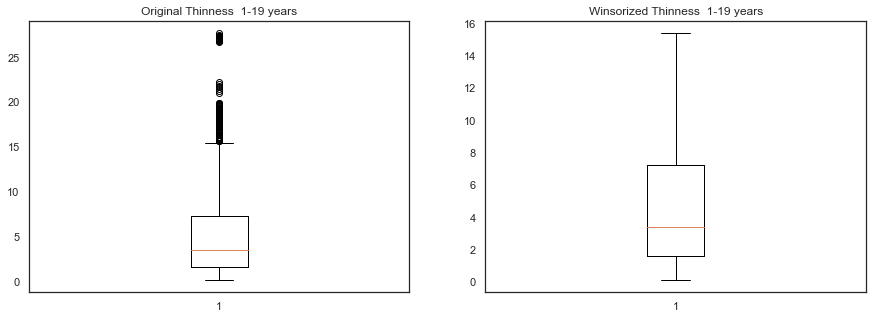

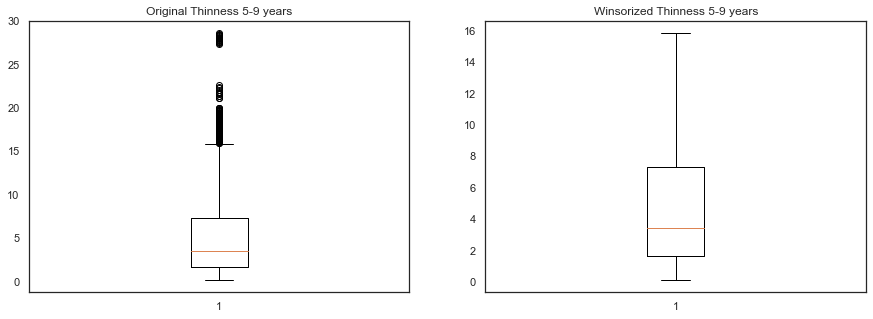

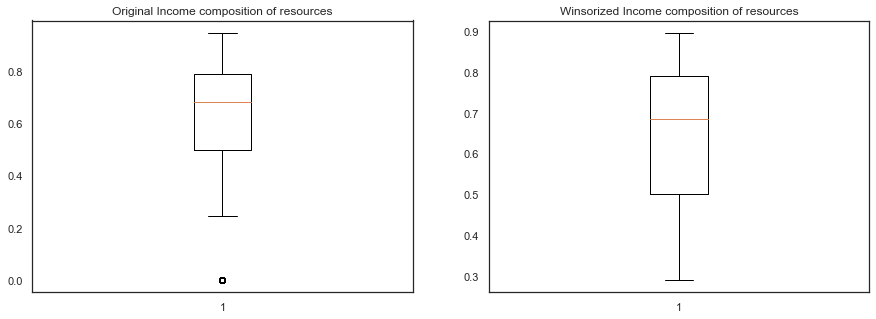

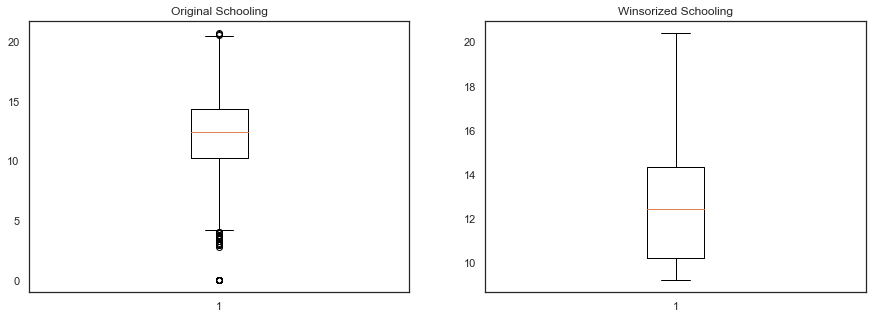

In [24]:
#Creating an empty dict to load all the winsorised data
winsor_dict = {}

#From the analysis found from the box plot, based on the outliers position, 
#various limit has been experimented to limit the outlier count. 

#In boxplot 1 ['Life expectancy'], It is seen that the outliers are in the lower boundanday of the plot,
winsor(num_col[0], lower_limit = 0.0409, show_plot=True)

#In boxplot 2['Adult Mortality'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[1], upper_limit = 0.028, show_plot =True)

#In boxplot 3['Infant deaths'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[2], upper_limit = 0.11, show_plot =True)

#In boxplot 4 ['Alcohol'],It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[3], upper_limit = 0.0025, show_plot =True)

#In boxplot 5['Percentage expenditure'], It is seen that the outliers are in upper boundanday of the plot,
winsor(num_col[4], upper_limit = 0.1325, show_plot =True)

#In boxplot 6 ['Hepatitis B'],It is seen that the outliers are in the lower boundanday of the plot,
winsor(num_col[5], lower_limit = 0.10, show_plot =True)

#In boxplot 7 ['Measles'],It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[6], upper_limit = 0.1846, show_plot =True)

#In boxplot 8 ['BMI'], It is seen that the outliers are in the lower boundanday of the plot,
winsor(num_col[7], lower_limit = 0.01, show_plot =True)

#In boxplot 9 ['Under-five deaths '], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[8], upper_limit = 0.1342, show_plot =True)

#In boxplot 10 ['Polio'], It is seen that the outliers are in the lower boundanday of the plot,
winsor(num_col[9], lower_limit = 0.10, show_plot =True)

#In boxplot 11['Total expenditure'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[10], upper_limit = 0.012, show_plot =True)

#In boxplot 12['Diphtheria '], It is seen that the outliers are in the lower boundanday of the plot,
winsor(num_col[11], lower_limit = 0.11, show_plot =True)

#In boxplot 13['HIV/AIDS'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[12], upper_limit = 0.185, show_plot =True)

#In boxplot 14['GDP'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[13], upper_limit = 0.12, show_plot =True)

#In boxplot 15['Population'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[14], upper_limit = 0.125, show_plot =True)

#In boxplot 16['Thinness  1-19 years'],It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[15], upper_limit = 0.031, show_plot =True)

#In boxplot 17['Thinness 5-9 years'],It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[16], upper_limit = 0.03302, show_plot =True)

#In boxplot 18,It is seen that the outliers are in the lower boundanday of the plot,
winsor(num_col[17], lower_limit = 0.05, upper_limit = 0.042, show_plot =True)

#In boxplot 19['Schooling'], It is seen that the outliers are in the lower boundanday of the plot,
winsor(num_col[18], lower_limit = 0.1804, upper_limit = 0.0011, show_plot =True)

In [25]:
#A new dataframe df_w with the winsorized data from dict

#Adding first three colunms using iloc from orignal dataframe to new dataframe
df_w= df.iloc[:, 0:3]

#Now Adding the data from winsor_dict to new dataframe df_w
for col in num_col:
    df_w[col] = winsor_dict[col]

Now the outliers has been eliminated with the Tukey's method and checking again to see if there is still outliers.

In [26]:
for col in num_col:
    outlier_count(col,data = df_w )

Variable Name: Life expectancy                 | Number of outliers: 0   | Percent of data that is outlier: 0.00%
Variable Name: Adult Mortality                 | Number of outliers: 0   | Percent of data that is outlier: 0.00%
Variable Name: Infant deaths                   | Number of outliers: 0   | Percent of data that is outlier: 0.00%
Variable Name: Alcohol                         | Number of outliers: 0   | Percent of data that is outlier: 0.00%
Variable Name: Percentage Expenditure          | Number of outliers: 0   | Percent of data that is outlier: 0.00%
Variable Name: Hepatitis B                     | Number of outliers: 0   | Percent of data that is outlier: 0.00%
Variable Name: Measles                         | Number of outliers: 0   | Percent of data that is outlier: 0.00%
Variable Name: BMI                             | Number of outliers: 0   | Percent of data that is outlier: 0.00%
Variable Name: Under-five deaths               | Number of outliers: 0   | Percent of da

All the variables have now been winsorized as little as possible in order to keep as much data in tact as possible while still being able to eliminate the outliers.

In [27]:
#First 5 rows of new winsorized dataframe
df_w.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,55,0.01,71.279624,65.0,899,...,52.0,8.16,65.0,0.1,584.259210,19896965.0,15.4,15.817647,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,55,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.4,15.817647,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,55,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,19896965.0,15.4,15.817647,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,55,0.01,78.184215,67.0,899,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.4,15.817647,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,55,0.01,7.097109,68.0,899,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.4,15.817647,0.454,9.5


In [28]:
df_w.shape

(2938, 22)

### Finding for right features in dataset for model

#### Correlation using Heatmap

Now we will plot the correlation matrix visulizing it with a heatmap with the dataset that has no outliers. The legend tells that the lighter colors show higher and positive correlation, while the darker shows low or negative.

<AxesSubplot:>

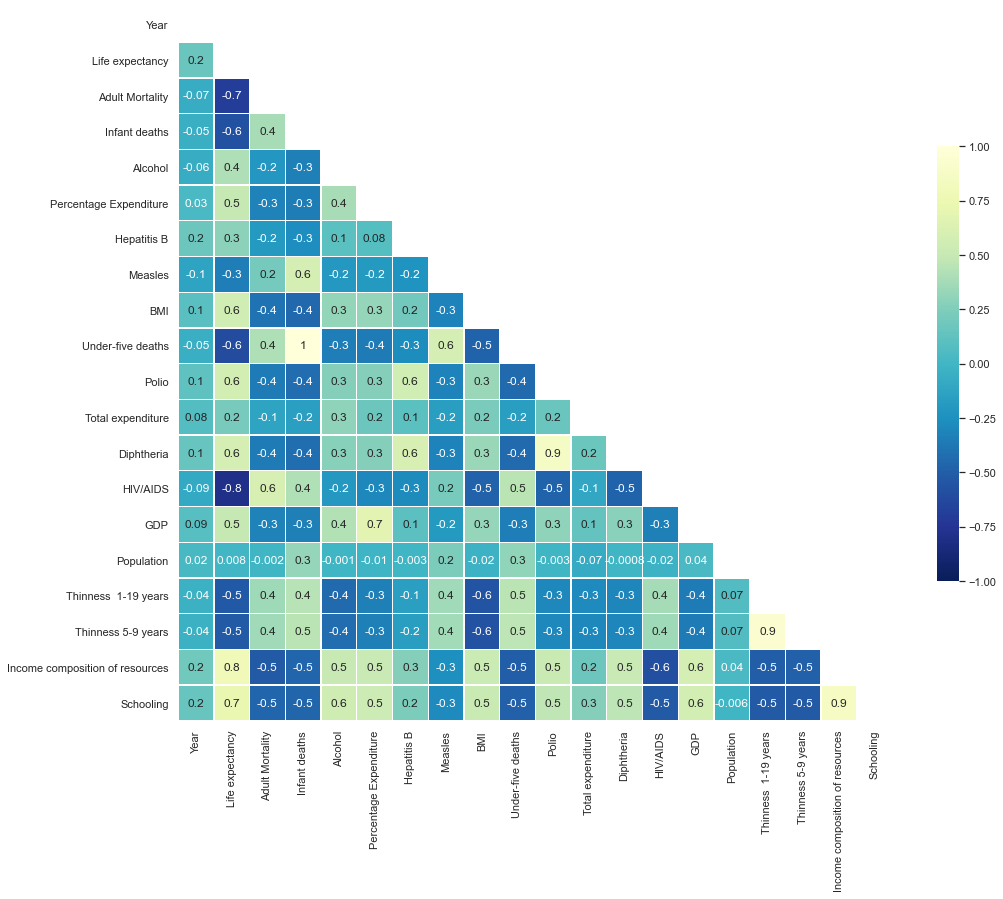

In [29]:
sb.set(font_scale=1)

# Set background color of corr matrix to White
sb.set_theme(style="white")

# Compute the correlation matrix
corr = df_w.corr()

# Generate a mask for the upper triangle
mask = np.triu(df_w.corr())

# Set up the matplotlib figure
plt.figure(figsize=(16,16))

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap="YlGnBu_r", vmax=1,vmin = -1,center=0, annot=True,
           square=True, fmt = '.1g', linewidths=.25, cbar_kws={"shrink": 0.5})

There is a very high correlation between Infant deaths and Under-five deaths, also between Thinness 1-19 years and Thinness 5-9 years, Percentage expenditure and GDP. On the other hand Life expectancy and Adult Mortality are very highly negatively correlated.

In [30]:
#Top 10 correlated variables in the dataset
top_corr = df_w.corr().abs().unstack().drop_duplicates().sort_values(kind="quicksort", ascending = False)
top_corr[1:10]

Infant deaths                    Under-five deaths                  0.994243
Thinness  1-19 years             Thinness 5-9 years                 0.943052
Polio                            Diphtheria                         0.860091
Income composition of resources  Schooling                          0.852494
Life expectancy                  HIV/AIDS                           0.794997
                                 Income composition of resources    0.789177
                                 Schooling                          0.724539
                                 Adult Mortality                    0.693564
Percentage Expenditure           GDP                                0.685614
dtype: float64

As our Target variable is Life expectancy, lets find the correlation between target variable and other variables

In [31]:
#Correlation between Target variable and other variables
df_w.corr()['Life expectancy'].sort_values(kind="quicksort",ascending=False)

Life expectancy                    1.000000
Income composition of resources    0.789177
Schooling                          0.724539
Diphtheria                         0.582281
Polio                              0.573570
BMI                                0.561937
Percentage Expenditure             0.495167
GDP                                0.492495
Alcohol                            0.409909
Hepatitis B                        0.293418
Total expenditure                  0.223591
Year                               0.161822
Population                         0.007580
Measles                           -0.337930
Thinness 5-9 years                -0.521764
Thinness  1-19 years              -0.524578
Infant deaths                     -0.571207
Under-five deaths                 -0.606956
Adult Mortality                   -0.693564
HIV/AIDS                          -0.794997
Name: Life expectancy, dtype: float64

In [32]:
df_w.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [33]:
#Taking the top most and bottom most correleated columns into a list

feature_list =['Schooling', 'Income composition of resources', 'BMI', 'Diphtheria', 'Polio', 'GDP', 'Alcohol', 'Percentage Expenditure', 
               'Thinness 5-9 years','Thinness  1-19 years', 'Adult Mortality']
feature_list

['Schooling',
 'Income composition of resources',
 'BMI',
 'Diphtheria',
 'Polio',
 'GDP',
 'Alcohol',
 'Percentage Expenditure',
 'Thinness 5-9 years',
 'Thinness  1-19 years',
 'Adult Mortality']

Lets plot regression plot to find the correlation between chosen feature variables and target variable

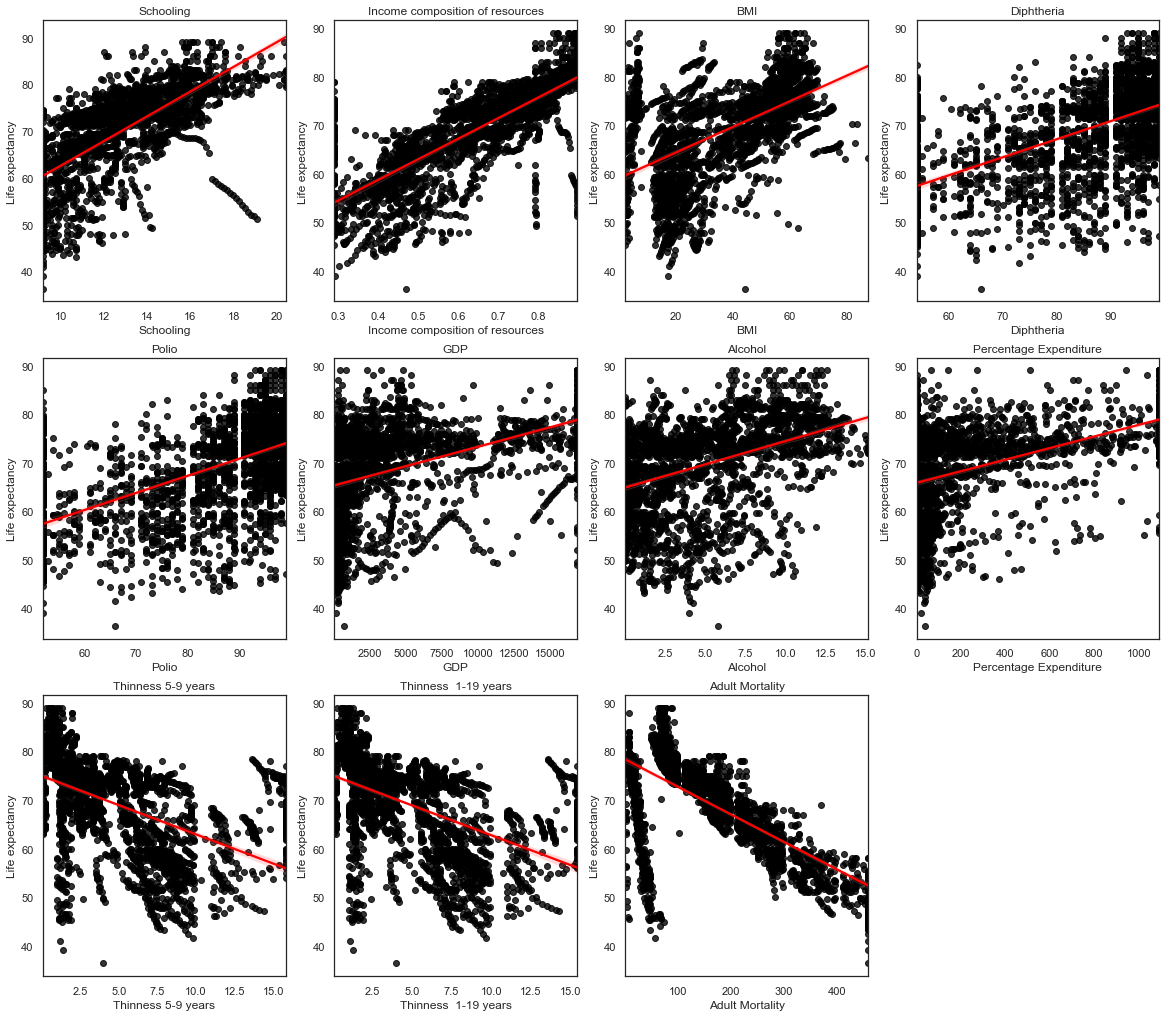

In [34]:
#Set the figure size
plt.figure(figsize=(20,30))

#Looping the feature cols from the above list and draw the plot with Target variable
for col_name in feature_list:
    #Draw subplot with index position from the feature list
    plt.subplot(5,4,(list(feature_list).index(col_name)+1))
    
    #Draw regplot for feature column as x with Target variable as y
    sb.regplot(x=df_w[col_name], y=df['Life expectancy'], scatter_kws={"color": "black"}, line_kws={"color": "red"})
    
    #Plot the title as column name
    plt.title(col_name)
    
    #Plot X,Y label
    plt.xlabel(col_name)
    plt.ylabel('Life expectancy')

plt.savefig('RegPlot.png')
plt.show()

With Life expectancy variable, Schooling, Income composition of resources, BMI, Diphtheria, Polio, GDP, Alcohol, Percentage expenditure are positively correlated and Thinness 5-9 years,Thinness 1-19 years, Adult Mortality are negatively correlated which is clearly shown in the above plot.

So, it is okay to consider only these columns as features variables.

In [35]:
#Now dropping Year and country columns which is felt irrelevant.
df_w = df_w.drop(columns= ["Year","Country"],axis = True)

In [36]:
#Status column is a categorical variable, we use one-hot encoding to convert it to numerical
status = pd.get_dummies(df_w.Status)

#Concating the df and dummy df
df_w = pd.concat([df_w, status], axis = 1)

#after concating the dummy column, droping status from dataset
df_w= df_w.drop(['Status'], axis=1)

df_w.head()

,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,65.0,263.0,55,0.01,71.279624,65.0,899,19.1,70,52.0,...,65.0,0.1,584.259210,19896965.0,15.4,15.817647,0.479,10.1,0,1
1,59.9,271.0,55,0.01,73.523582,62.0,492,18.6,70,58.0,...,62.0,0.1,612.696514,327582.0,15.4,15.817647,0.476,10.0,0,1
2,59.9,268.0,55,0.01,73.219243,64.0,430,18.1,70,62.0,...,64.0,0.1,631.744976,19896965.0,15.4,15.817647,0.470,9.9,0,1
3,59.5,272.0,55,0.01,78.184215,67.0,899,17.6,70,67.0,...,67.0,0.1,669.959000,3696958.0,15.4,15.817647,0.463,9.8,0,1
4,59.2,275.0,55,0.01,7.097109,68.0,899,17.2,70,68.0,...,68.0,0.1,63.537231,2978599.0,15.4,15.817647,0.454,9.5,0,1


As from the above plot, Schooling, Income composition of resources, BMI, Diphtheria, Polio, Thinness 1-19 years, Adult Mortality,GDP, Alcohol, Percentage expenditure and Thinness 5-9 years are considered for modeling as it is good correlation with Target variable.

# Modeling

In [37]:
#Import sklearn pakages for modeling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Split the data into training and test data

In [38]:
#preparing list to compare all models
Model_Compare = [[]]

#prepare train and test data
X_feature=df_w.drop(columns=['Life expectancy','Hepatitis B','Total expenditure','HIV/AIDS','Population','Measles','Infant deaths']).values
Y_label=df_w['Life expectancy'].values

X_feature_train,X_feature_test,Y_label_train,Y_label_test=train_test_split(X_feature,Y_label,test_size=0.2, 
                                     random_state=42, shuffle=True)

In [39]:
print('X_feature_training_set : ', X_feature_train.shape)
print('X_feature_test_set : ', X_feature_test.shape)
print('Y_label_train_set :', Y_label_train.shape) 
print('Y_label_test_set : ', Y_label_test.shape)

X_feature_training_set :  (2350, 14)
X_feature_test_set :  (588, 14)
Y_label_train_set : (2350,)
Y_label_test_set :  (588,)


### [Model-1] Linear Regression

In [40]:
#Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_feature_train,Y_label_train)

#Make predictions
Y_pred = lin_reg.predict(X_feature_train)

#Calculating MSE and RMSE
lr_train_mse = mean_squared_error(Y_label_train,Y_pred)
lr_train_rmse = np.sqrt(lr_train_mse)

lr_r2_score = r2_score(Y_label_train,Y_pred)

#Testing Score
test_score = lin_reg.score(X_feature_test, Y_label_test)

print("Linear Regression:")
print("Mean squared error: %.2f"%lr_train_mse)
print("Root Mean Squared error: %.2f"%lr_train_rmse)
print("R^2 score for lin_reg training set: %.2f"%lr_r2_score)
print("Test-set score:",test_score)

# Model_Compare.append(['Linear Regression', round(lr_train_mse,3), round(lr_train_rmse,3), round(lr_r2_score, 3), round(test_score,3)])
Model_Compare[0] = ['Linear Regression', round(lr_train_mse,3), round(lr_train_rmse,3), round(lr_r2_score, 3), round(test_score,3)]
#print(Model_Compare)

Linear Regression:
Mean squared error: 17.65
Root Mean Squared error: 4.20
R^2 score for lin_reg training set: 0.79
Test-set score: 0.8193879366432149


### [Model-2] Random Forest Classifier

In [41]:
#Random Forest
forest_reg = RandomForestRegressor()
forest_reg.fit(X_feature_train,Y_label_train)

#Make predictions
Y_pred = forest_reg.predict(X_feature_train)

#Calculating MSE and RMSE
rf_train_mse = mean_squared_error(Y_label_train,Y_pred)
rf_train_rmse = np.sqrt(rf_train_mse)

#Calculating r2 score
forest_r2_score = r2_score(Y_label_train,Y_pred)

#Testing score
test_score = forest_reg.score(X_feature_test, Y_label_test)

print('Random Forest:')
print("Mean squared error: %.2f"%rf_train_mse)
print("Root Mean Squared error: %.2f"%rf_train_rmse)
print("R^2 score for forest training set: %.2f"%forest_r2_score)
print("Test-set score:",forest_reg.score(X_feature_test, Y_label_test))

Model_Compare.append(['Random Forest', round(rf_train_mse,3), round(rf_train_rmse,3), round(forest_r2_score, 3), round(test_score,3)])

Random Forest:
Mean squared error: 0.50
Root Mean Squared error: 0.71
R^2 score for forest training set: 0.99
Test-set score: 0.9675344347326689


### Comparing Models

In [42]:
#Printing models comparision table
# Comparision_Table = Comparision_Table[1:]
Comparision_Table = pd.DataFrame(Model_Compare, columns=['Model','MSE','RMSE','R2 Score','Test-Score'])
print(Comparision_Table)

               Model     MSE   RMSE  R2 Score  Test-Score
0  Linear Regression  17.651  4.201     0.793       0.819
1      Random Forest   0.499  0.706     0.994       0.968
